In [157]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
import torchvision.datasets as datasets
import numpy as np

# Preparing the MNIST Dataset

In [158]:
# mnist = pandas.read_csv("sample_data/mnist_train_small.csv")
# mnist.head()

In [159]:
mnist = mnist/255.  # normalising the pixels 

In [160]:
mnist = np.array(mnist)
mnist.shape

(19999, 785)

In [161]:
####  Data preparation for tensorflow part


import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
train_X = train_X/255
train_y = train_Y/255


In [162]:
## Designing networks

encoder_input = keras.Input(shape=(28,28,1), name="img")
x = Flatten()(encoder_input)    # 784 X 1 (is the output)
encoder_output = Dense(25, activation = "relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = Dense(25, activation="relu")(encoder_output)
y = Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(y)

Autoencoders = keras.Model(encoder_input, decoder_output, name="Autoencoders")

opt = Adam(decay = 1e-6)

Autoencoders.compile(opt, loss="mse")
Autoencoders.summary()

Model: "Autoencoders"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 25)                19625     
_________________________________________________________________
dense_31 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_32 (Dense)             (None, 784)               20384     
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
Total params: 40,659
Trainable params: 40,659
Non-trainable params: 0
__________________________________________________

# Training

In [163]:
results = Autoencoders.fit(train_X, train_X, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0319 - val_loss: 0.0244
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0235 - val_loss: 0.0225
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0225 - val_loss: 0.0221
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0219 - val_loss: 0.0216


In [164]:
Autoencoders.save("Autoencoders.model")

INFO:tensorflow:Assets written to: Autoencoders.model/assets


In [165]:
loss = results.history['loss']
val_loss = results.history['val_loss']
r_epochs = range(5)

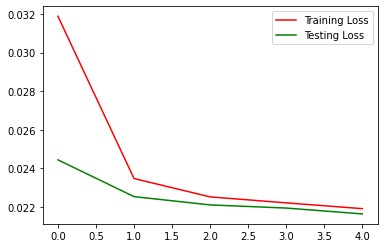

In [166]:

#Plot training and validation loss per epoch
plt.plot(r_epochs,loss,'r',label='Training Loss')
plt.plot(r_epochs,val_loss,'g',label='Testing Loss')   
plt.legend()
plt.show()

# Prediction part

In [167]:
predict = encoder.predict([test_X[0].reshape(-1, 28, 28, 1)])
print(predict[0].shape)
print(predict[0])

(25,)
[ 136.62184  417.35095  284.4662   739.0717   752.1176   524.06683
  237.90718 1133.1768     0.       331.5162   229.7922   582.2144
  456.28732    0.       273.93332  482.7766   342.6943    87.24531
  601.57635  732.9138   334.0005   116.35559  813.73883  302.50558
 1013.18   ]


In [168]:
print(len(predict))
print(predict)

1
[[ 136.62184  417.35095  284.4662   739.0717   752.1176   524.06683
   237.90718 1133.1768     0.       331.5162   229.7922   582.2144
   456.28732    0.       273.93332  482.7766   342.6943    87.24531
   601.57635  732.9138   334.0005   116.35559  813.73883  302.50558
  1013.18   ]]


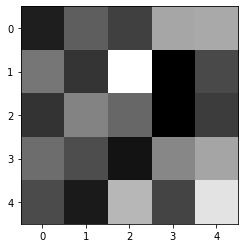

In [169]:
plt.imshow(predict[0].reshape((5, 5)), cmap="gray")

(28, 28)


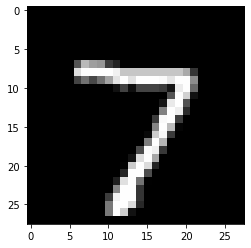

In [170]:
plt.imshow(test_X[0], cmap="gray")
print(test_X[0].shape)

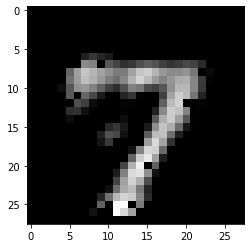

In [171]:
predict = Autoencoders.predict([test_X[0].reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

In [172]:
print(test_X[0].shape)

(28, 28)


In [177]:
import random
###  will put some random noises in the image..
def noise_injection(img, prob = 5):
  noisy = []
  for row in img:
    new_row = []
    for pix in row:
            if random.choice(range(100)) <= prob: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

def remove_values(img, prob = 5):
  noisy = []
  for row in img:
    new_row = []
    for pix in row:
            if random.choice(range(100)) <= prob: 
                new_val = 0
                new_row.append(new_val)
            else:
                new_row.append(pix)
    noisy.append(new_row)
  return np.array(noisy)

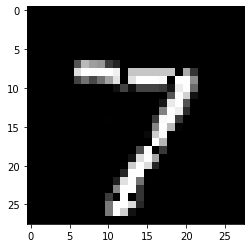

In [181]:
noise = noise_injection(test_X[0], 10)
plt.imshow(noise, cmap="gray")

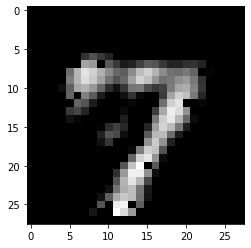

In [185]:
predict = Autoencoders.predict([noise.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

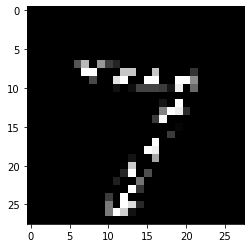

In [187]:
noise = noise_injection(test_X[0], 40)
plt.imshow(noise, cmap="gray")

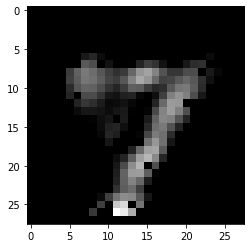

In [188]:
predict = Autoencoders.predict([noise.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

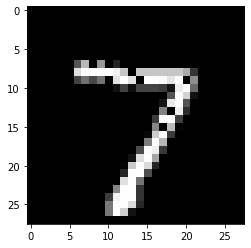

In [183]:
removed = remove_values(test_X[0], 10)
plt.imshow(removed, cmap="gray")

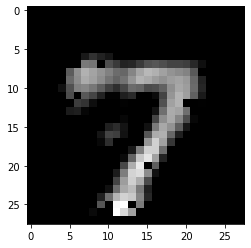

In [186]:
predict = Autoencoders.predict([removed.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")

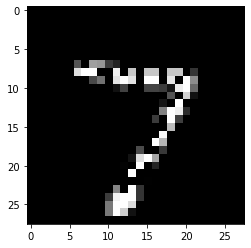

In [189]:
removed = remove_values(test_X[0], 40)
plt.imshow(removed, cmap="gray")

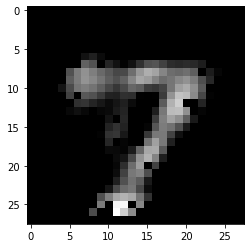

In [190]:
predict = Autoencoders.predict([removed.reshape(-1,28,28,1)])
img = predict[0]
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")